## Problem Statement: 
### Implement a simple deep neural network (DNN) for solving the polynomial equation $𝑦 = 5𝑥^3 - 10𝑥^2 - 20𝑥 + 10$ with the following specifications:

### Necessary Import

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import random

### a) Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.

In [238]:
input = keras.Input(shape=(1,))
hidden_layer_1 = keras.layers.Dense(32, activation="relu")(input)
hidden_layer_2 = keras.layers.Dense(64, activation="relu")(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(128, activation="relu")(hidden_layer_2)
output = keras.layers.Dense(1, name = "output_layer")(hidden_layer_3)

model = keras.Model(input, output)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

### b) Generate training samples within the range of -20 to +20. Use an appropriate method for normalizing the training data in the range of -1 to +1

In [239]:
# Given Function 
def function_y(x):
    return (pow(5*𝑥,3)-pow(10*𝑥,2)-20*𝑥+10)

In [240]:
# Data Generation
def generate_data(n):
    x = np.linspace(-20,20,n)
    y = function_y(x)
    return x,y

In [241]:
# Get Min, Max
def get_min_max(x):
    x_min = np.min(x)
    x_max = np.max(x)
    return  x_min, x_max

In [242]:
# Normalization
def normalize(x, x_min, x_max):
    return 2 * (x - x_min) / (x_max - x_min) - 1

In [243]:
# Inverse Normalization
def inverse_normalize(normalized_x, x_min, x_max):
    return (normalized_x + 1) / 2 * (x_max - x_min) + x_min

In [244]:
# Generate Sample Data
x,y = generate_data(10_000)

len(x), len(y)

(10000, 10000)

In [245]:
# Normalize Dataset
x_min, x_max = get_min_max(x)
y_min, y_max = get_min_max(y)
x = normalize(x, x_min, x_max)
y = normalize(y, y_min, y_max)

### c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.

In [246]:
# Combine features and labels
# x = [a for a in x]
data = list(zip(x, y))

# Shuffle data
random.seed(45)
random.shuffle(data)

# Split data
total_size = len(data)
test_split_idx = int(total_size * 0.05) 
val_split_idx = test_split_idx * 2

test_data = data[:test_split_idx]
val_data = data[test_split_idx:val_split_idx]
train_data = data[val_split_idx:]

X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)
X_test, y_test = zip(*test_data)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)


print(f"Train: {len(X_train)}, {len(y_train)}")
print(f"Test: {len(X_test)}, {len(y_test)}")
print(f"Validation: {len(X_val)}, {len(y_val)}")

Train: 9000, 9000
Test: 500, 500
Validation: 500, 500


In [247]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.mean_squared_error, metrics=[keras.metrics.R2Score()])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0298 - r2_score: 0.7931 - val_loss: 1.7710e-04 - val_r2_score: 0.9988
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 1.2813e-04 - r2_score: 0.9991 - val_loss: 3.2333e-05 - val_r2_score: 0.9998
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 2.4149e-05 - r2_score: 0.9998 - val_loss: 2.1021e-05 - val_r2_score: 0.9999
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 1.2967e-05 - r2_score: 0.9999 - val_loss: 3.6770e-06 - val_r2_score: 1.0000
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 6.0870e-06 - r2_score: 1.0000 - val_loss: 8.5233e-06 - val_r2_score: 0.9999
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 5.2451e-06 - r2_score: 1.0000 - val_loss: 3.0853e-06 - val_r2_score: 1.0000
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 9.6343e-06 - r2_score: 0.9999 - val_loss: 3.0103e-06 - val_r2_score: 1.0000
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 

### d) Display the training accuracy vs validation accuracy and training error vs validation error curves.

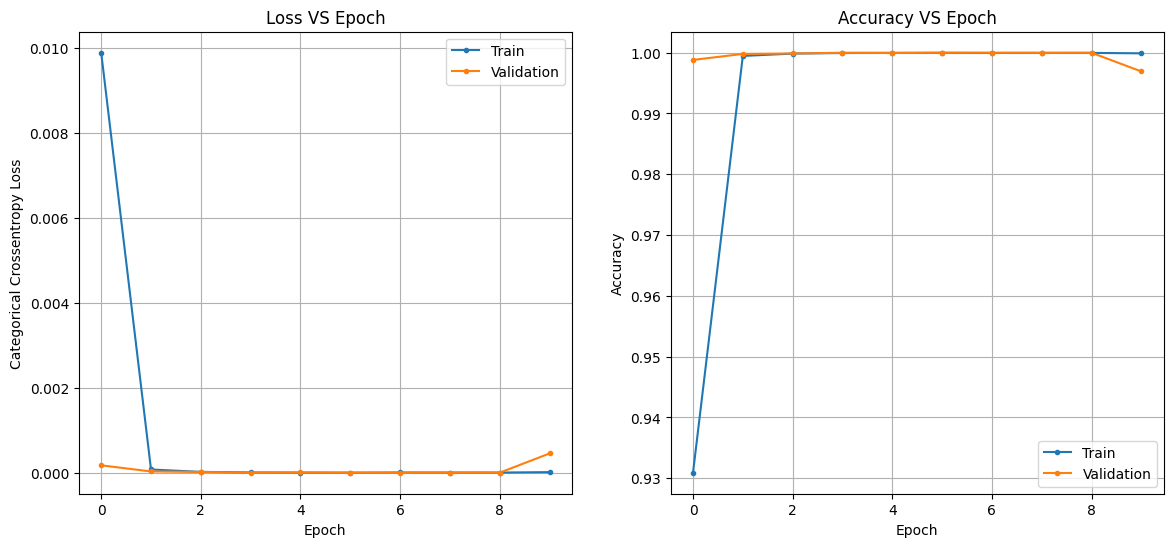

In [248]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')

plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend(["Train", "Validation"])
plt.title('Loss VS Epoch')
plt.grid('on')


plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score'], '.-')
plt.plot(history.history['val_r2_score'], '.-')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["Train", "Validation"])
plt.title('Accuracy VS Epoch')
plt.grid('on')

In [249]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8497e-04 - r2_score: 0.9959 
Test Loss: 0.00048427857109345496
Test Accuracy: 0.9964590668678284


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


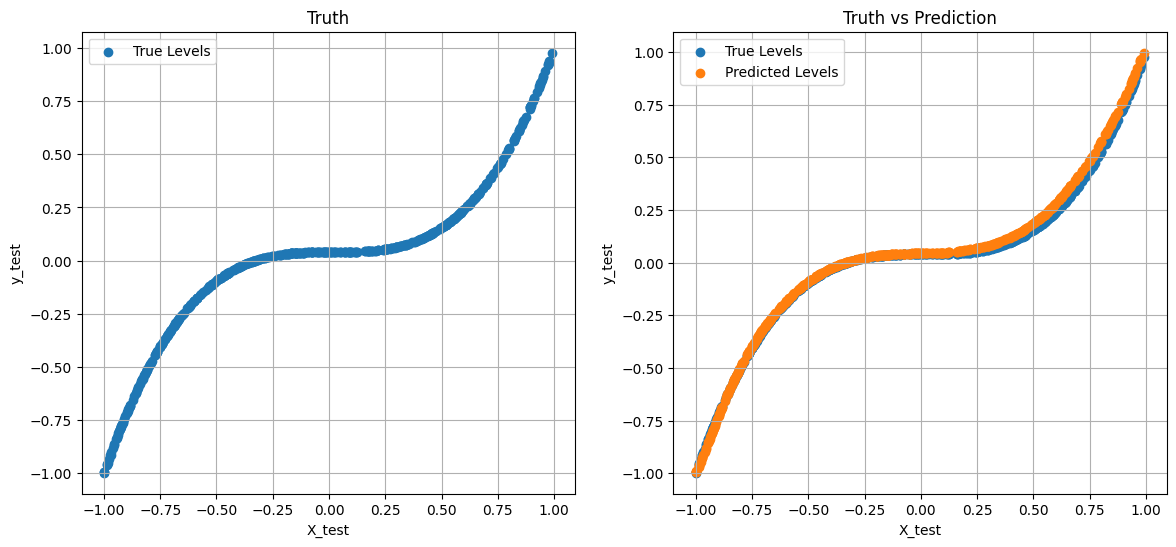

In [250]:
predictions = model.predict(X_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test,y_test)

plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend(["True Levels"])
plt.title('Truth')
plt.grid('on')


plt.subplot(1, 2, 2)
plt.scatter(X_test,y_test)
plt.scatter(X_test,predictions)

plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend(["True Levels", "Predicted Levels"])
plt.title('Truth vs Prediction')
plt.grid('on')

### Test in Real World

In [252]:
sample = normalize([4,12,20], x_min, x_max)
# normalize_sample = np.array([4,12,20])
normalize_sample = np.array(sample)
sample_result = model.predict(normalize_sample)
sample_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.05984263],
       [0.28234854],
       [1.0126368 ]], dtype=float32)

In [257]:
inverse_normalize(sample_result, y_min, y_max)

array([[ 19828.64948273],
       [242245.57419777],
       [972241.60686493]])

In [253]:
function_y(4)

6330

In [254]:
function_y(16)

486090

In [255]:
function_y(20)

959610